### Instalamos e importamos los paquetes a usar

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from formulaic import Formula


### Cargamos los datos 'sube-2023.csv' e imprimimos la información para ver con que elementos estamos trabajando

In [2]:
sube = pd.read_csv('sube-2023.csv')
sube.info()
sube.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   472291 non-null  object
 1   NOMBRE_EMPRESA   472291 non-null  object
 2   LINEA            472291 non-null  object
 3   AMBA             472291 non-null  object
 4   TIPO_TRANSPORTE  472291 non-null  object
 5   JURISDICCION     469742 non-null  object
 6   PROVINCIA        469720 non-null  object
 7   MUNICIPIO        469720 non-null  object
 8   CANTIDAD         472291 non-null  int64 
 9   DATO_PRELIMINAR  472291 non-null  object
dtypes: int64(1), object(9)
memory usage: 36.0+ MB


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


# Ejercicio 1

In [3]:
display(sube.dtypes)

DIA_TRANSPORTE     object
NOMBRE_EMPRESA     object
LINEA              object
AMBA               object
TIPO_TRANSPORTE    object
JURISDICCION       object
PROVINCIA          object
MUNICIPIO          object
CANTIDAD            int64
DATO_PRELIMINAR    object
dtype: object

In [4]:
sube['DIA_TRANSPORTE'] = pd.to_datetime(sube['DIA_TRANSPORTE'], format = "%Y-%m-%d")
sube['FECHA_DIA'] = sube['DIA_TRANSPORTE'].dt.day_name()
sube['FECHA_MES'] = sube['DIA_TRANSPORTE'].dt.month.apply(lambda x: str(x).zfill(2))
sube['FECHA_ORDINAL'] = sube['DIA_TRANSPORTE'].dt.dayofyear

# Ejercicio 2

#### Creamos el DataFrame 'datos_amba' y le damos el formato pedido

In [5]:
datos_amba = sube[sube['AMBA'] == "SI"]
datos_amba = datos_amba.reset_index(drop = True)

In [6]:
datos_amba.columns = datos_amba.columns.str.lower()
datos_amba = datos_amba.rename(columns = {'dia_transporte' : 'fecha','cantidad':'pasajeros'})
datos_amba.drop(columns=['dato_preliminar','nombre_empresa','municipio','amba','provincia'], inplace=True)
#aca no se si habia que borrar todas esas columnas pq la consigna dice que hay que borrar solo los datos preeliminares pero en el df que nos pasan no aparecen todas las que borre :)
nuevo_orden = ['fecha','fecha_dia','fecha_mes','fecha_ordinal','jurisdiccion','linea','pasajeros','tipo_transporte']
datos_amba = datos_amba.reindex(columns=nuevo_orden)
datos_amba['fecha_dia'] = datos_amba['fecha_dia'].str.slice(0, 3)

datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
2,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
3,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
4,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


# Ejercicio 3

#### Utilizamos datos_amba para obtener información

In [7]:
total_pasajeros = datos_amba['pasajeros'].sum()
pasajeros_colectivo = datos_amba.loc[datos_amba['tipo_transporte'] == 'COLECTIVO', 'pasajeros'].sum()
pasajeros_tren = datos_amba.loc[datos_amba['tipo_transporte'] == 'TREN', 'pasajeros'].sum()
pasajeros_subte = datos_amba.loc[datos_amba['tipo_transporte'] == 'SUBTE', 'pasajeros'].sum()

print('Porcentaje de pasajeros por tipo de transporte')
print('Colectivo: ', round(pasajeros_colectivo/total_pasajeros * 100,2))
print('Tren: ', round(pasajeros_tren/total_pasajeros * 100,2))
print('Subte: ', round(pasajeros_subte/total_pasajeros * 100,2))

Porcentaje de pasajeros por tipo de transporte
Colectivo:  83.77
Tren:  9.42
Subte:  6.81


In [8]:
max_pasajeros_index = datos_amba[datos_amba['tipo_transporte'] == 'SUBTE']['pasajeros'].idxmax()
fila_max_pasajeros = datos_amba.iloc[max_pasajeros_index]

print("Mes y linea de subte con mayor cantidad de pasajeros")
print('Mes: ', fila_max_pasajeros['fecha_mes'])
print('Linea de subte: ', fila_max_pasajeros["linea"])

Mes y linea de subte con mayor cantidad de pasajeros
Mes:  12
Linea de subte:  LINEA_B


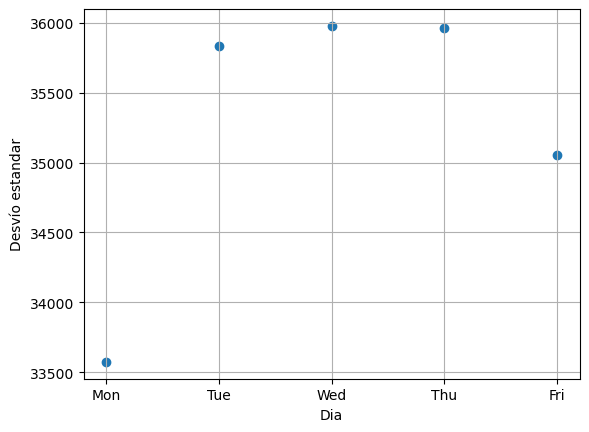

In [9]:
dias_habiles = ["Mon", "Tue", "Wed", "Thu", "Fri"]
desvio_estandar = []
for d in dias_habiles:
    desvio_estandar.append(datos_amba[datos_amba['fecha_dia'] == d]['pasajeros'].std())

plt.scatter(dias_habiles,desvio_estandar)
plt.xlabel('Dia')
plt.ylabel('Desvío estandar')
plt.grid(True)
plt.show()

# Ejercicio 4

#### ¿Cómo cambió la actividad en el transporte público entre 2020 y 2023?

#### Tomamos los datos de cada año

In [10]:
sube_2020 = pd.read_csv("sube-2020.csv")
sube_2021 = pd.read_csv("sube-2021.csv")
sube_2022 = pd.read_csv("sube-2022.csv")
sube_2023 = pd.read_csv("sube-2023.csv")

#### Transformamos las columnas DIA_TRANSPORTE a fecha


In [11]:
sube_2020["DIA_TRANSPORTE"] = pd.to_datetime(sube_2020["DIA_TRANSPORTE"], format = "%Y-%m-%d")
sube_2021["DIA_TRANSPORTE"] = pd.to_datetime(sube_2021["DIA_TRANSPORTE"], format = "%Y-%m-%d")
sube_2022["DIA_TRANSPORTE"] = pd.to_datetime(sube_2022["DIA_TRANSPORTE"], format = "%Y-%m-%d")
sube_2023["DIA_TRANSPORTE"] = pd.to_datetime(sube_2023["DIA_TRANSPORTE"], format = "%Y-%m-%d")

#### Queremos la cantidad de pasajeros diarios para cada año


In [12]:
cantidad_pasajeros_diarios_2020 = sube_2020.groupby(["DIA_TRANSPORTE"])["CANTIDAD"].sum()
cantidad_pasajeros_diarios_2021 = sube_2021.groupby(["DIA_TRANSPORTE"])["CANTIDAD"].sum()
cantidad_pasajeros_diarios_2022 = sube_2022.groupby(["DIA_TRANSPORTE"])["CANTIDAD"].sum()
cantidad_pasajeros_diarios_2023 = sube_2023.groupby(["DIA_TRANSPORTE"])["CANTIDAD"].sum()

#### Manejo los índices para meter todo en un DataFrame


In [13]:
cantidad_pasajeros_diarios_2020 = cantidad_pasajeros_diarios_2020.reset_index()
cantidad_pasajeros_diarios_2021 = cantidad_pasajeros_diarios_2021.reset_index().rename(index = lambda i: i + 366)
cantidad_pasajeros_diarios_2022 = cantidad_pasajeros_diarios_2022.reset_index().rename(index = lambda i: i + 731)
cantidad_pasajeros_diarios_2023 = cantidad_pasajeros_diarios_2023.reset_index().rename(index = lambda i: i + 1096)

In [14]:
# Juntamos
cantidad_pasajeros_diarios = pd.concat([cantidad_pasajeros_diarios_2020, cantidad_pasajeros_diarios_2021,
                                       cantidad_pasajeros_diarios_2022, cantidad_pasajeros_diarios_2023])

#Agregamos la variable año
cantidad_pasajeros_diarios["AÑO"] = cantidad_pasajeros_diarios["DIA_TRANSPORTE"].dt.year.astype(str) # Lo paso como str para que coloree mejor

#Agregamos la variable día_año
cantidad_pasajeros_diarios["DIA_AÑO"] = cantidad_pasajeros_diarios["DIA_TRANSPORTE"].dt.day_of_year

#Agregamos la variable semana_año
cantidad_pasajeros_diarios["SEMANA_AÑO"] = cantidad_pasajeros_diarios["DIA_TRANSPORTE"].dt.isocalendar().week

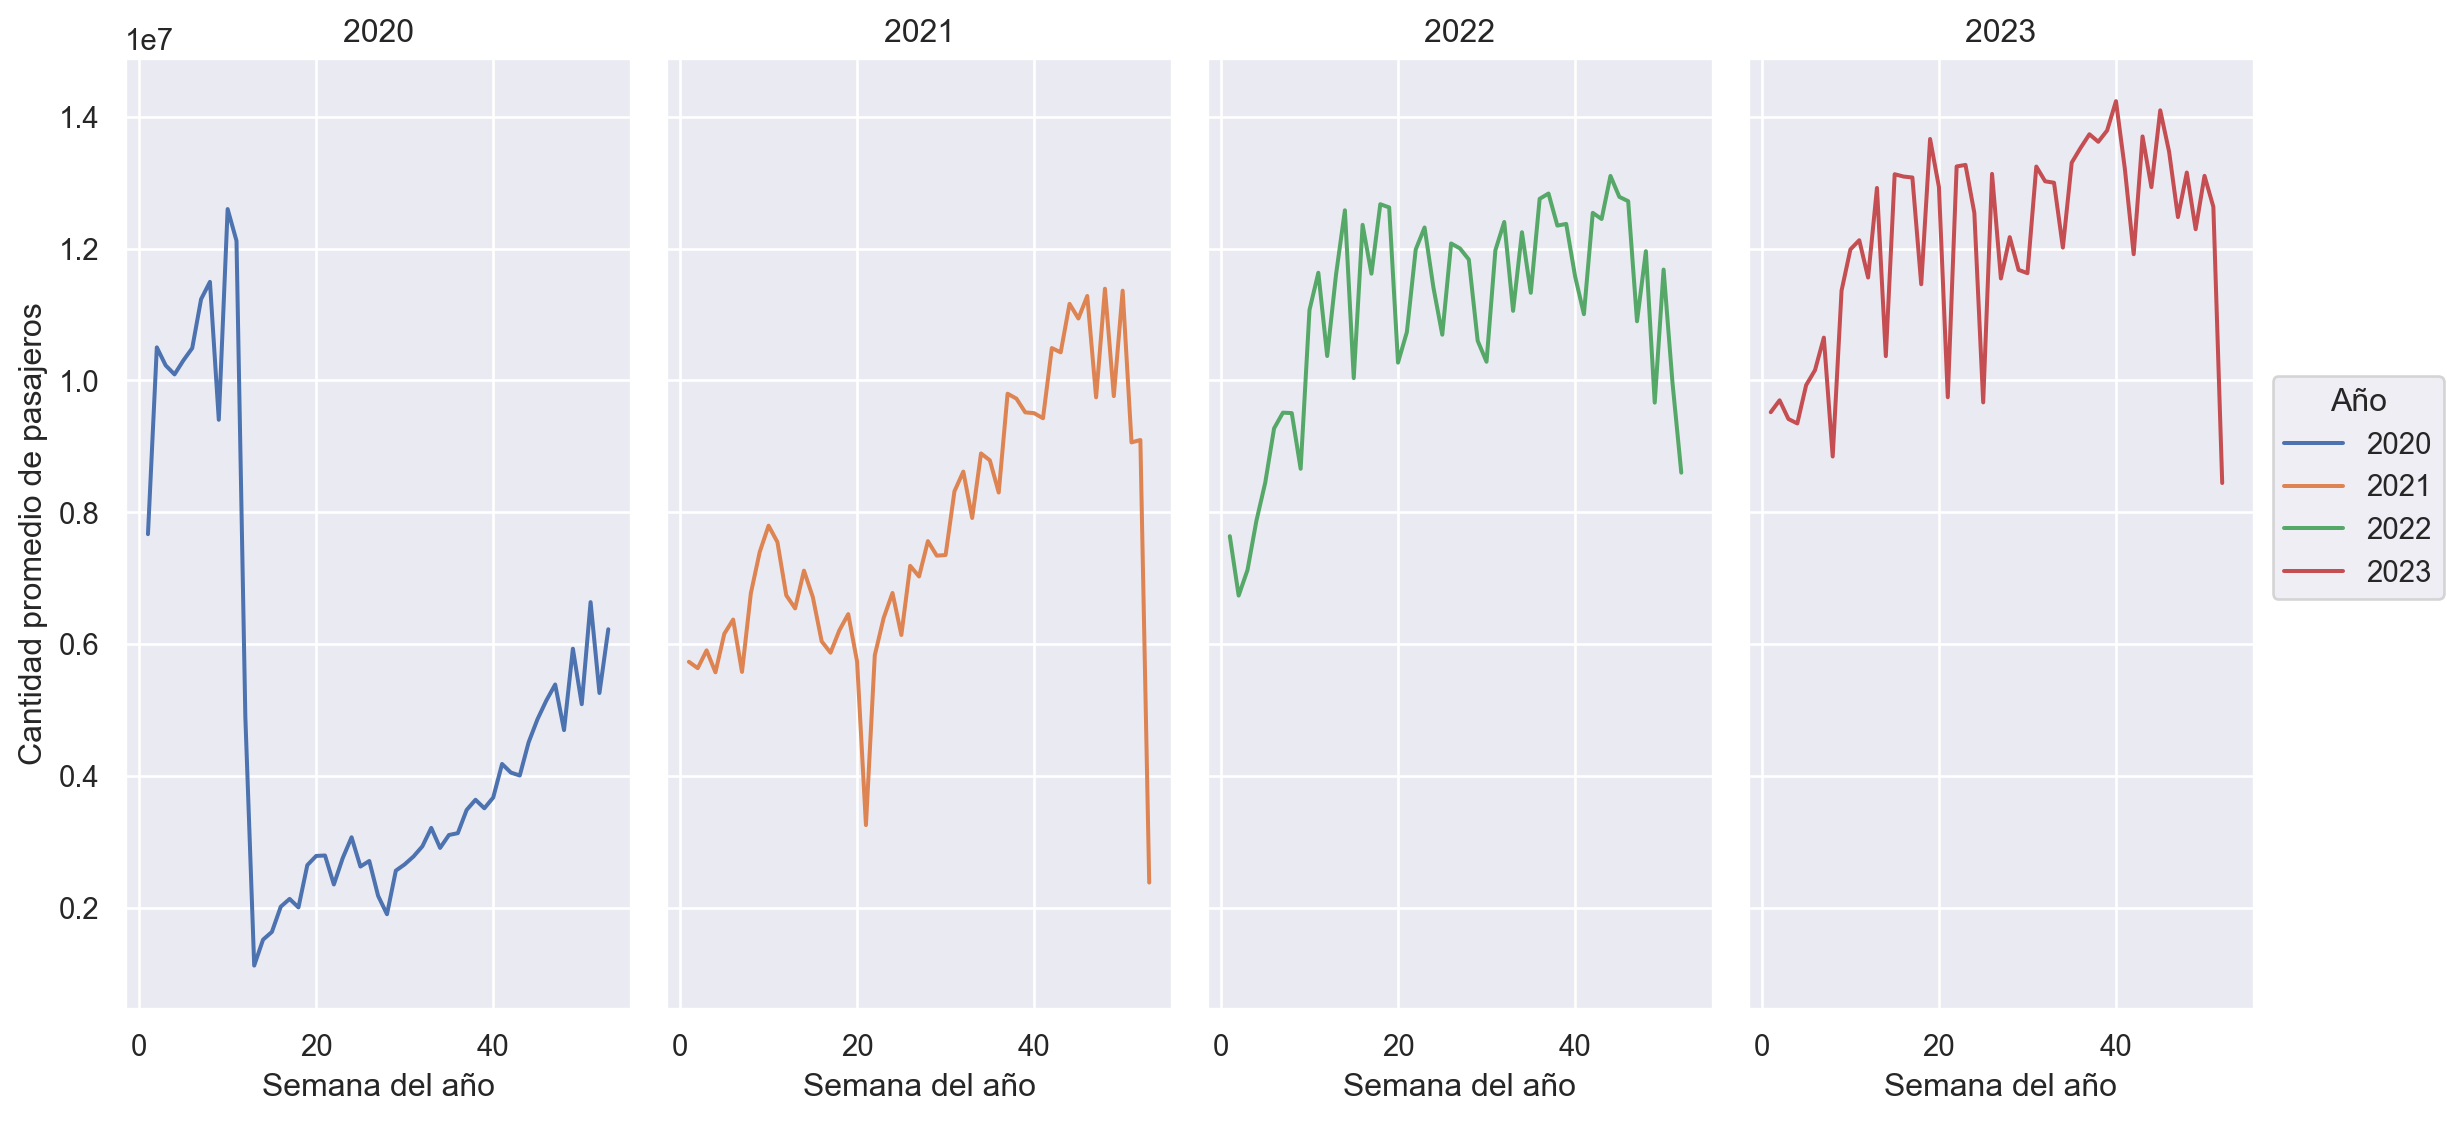

In [15]:
# Graficamos
(
    so.Plot(data = cantidad_pasajeros_diarios, x = "SEMANA_AÑO", y = "CANTIDAD", color = "AÑO")
    .add(so.Line(), so.Agg("mean"))
    .facet("AÑO")
    .label(x = "Semana del año", y = "Cantidad promedio de pasajeros", color = "Año")
    .layout(size=(12,6))
)

Podemos observar cómo en las primeras semanas del año 2020, la cantidad de pasajeros desciende drásticamente.

Veamos cómo la explicación de este fenómeno, puede estar dada por la pandemia de Covid-19 🦠.

In [16]:
# Añadimos los datos del covid
datos_covid = pd.read_csv("datosCovid2.csv")

In [17]:
# Transformamos la columna fecha a tipo de dato datetime y agregamos las columnas año y semana.
datos_covid["fecha"] = pd.to_datetime(datos_covid["fecha"], format = "%Y-%m-%d")
datos_covid["año"] = datos_covid["fecha"].dt.year
datos_covid["semana_año"] = datos_covid["fecha"].dt.isocalendar().week

In [18]:
# Restrinjimos los datos a 2020 y 2021, años donde el virus tuvo mayor incidencia
cantidad_pasajeros_diarios_2020_2021 = cantidad_pasajeros_diarios[cantidad_pasajeros_diarios["AÑO"].astype(int) < 2022]
datos_covid_2020_2021 = datos_covid[datos_covid["año"] < 2022]

In [19]:
# Para poder comparar las curvas, escalamos los datos
datos_covid_2020_2021["casos_dx_scaled"] = ((datos_covid_2020_2021["casos_dx"] - datos_covid_2020_2021["casos_dx"].min()) / 
                                            (datos_covid_2020_2021["casos_dx"].max() - datos_covid_2020_2021["casos_dx"].min()))

cantidad_pasajeros_diarios_2020_2021["CANTIDAD_scaled"] = ((cantidad_pasajeros_diarios_2020_2021["CANTIDAD"] - cantidad_pasajeros_diarios_2020_2021["CANTIDAD"].min()) / 
                                                           (cantidad_pasajeros_diarios_2020_2021["CANTIDAD"].max() - cantidad_pasajeros_diarios_2020_2021["CANTIDAD"].min()))

C:\Users\agush\AppData\Local\Temp\ipykernel_11032\4152362270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_covid_2020_2021["casos_dx_scaled"] = ((datos_covid_2020_2021["casos_dx"] - datos_covid_2020_2021["casos_dx"].min()) /
C:\Users\agush\AppData\Local\Temp\ipykernel_11032\4152362270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cantidad_pasajeros_diarios_2020_2021["CANTIDAD_scaled"] = ((cantidad_pasajeros_diarios_2020_2021["CANTIDAD"] - cantidad_pasajeros_diarios_2020_2021["CANTIDAD"].mi

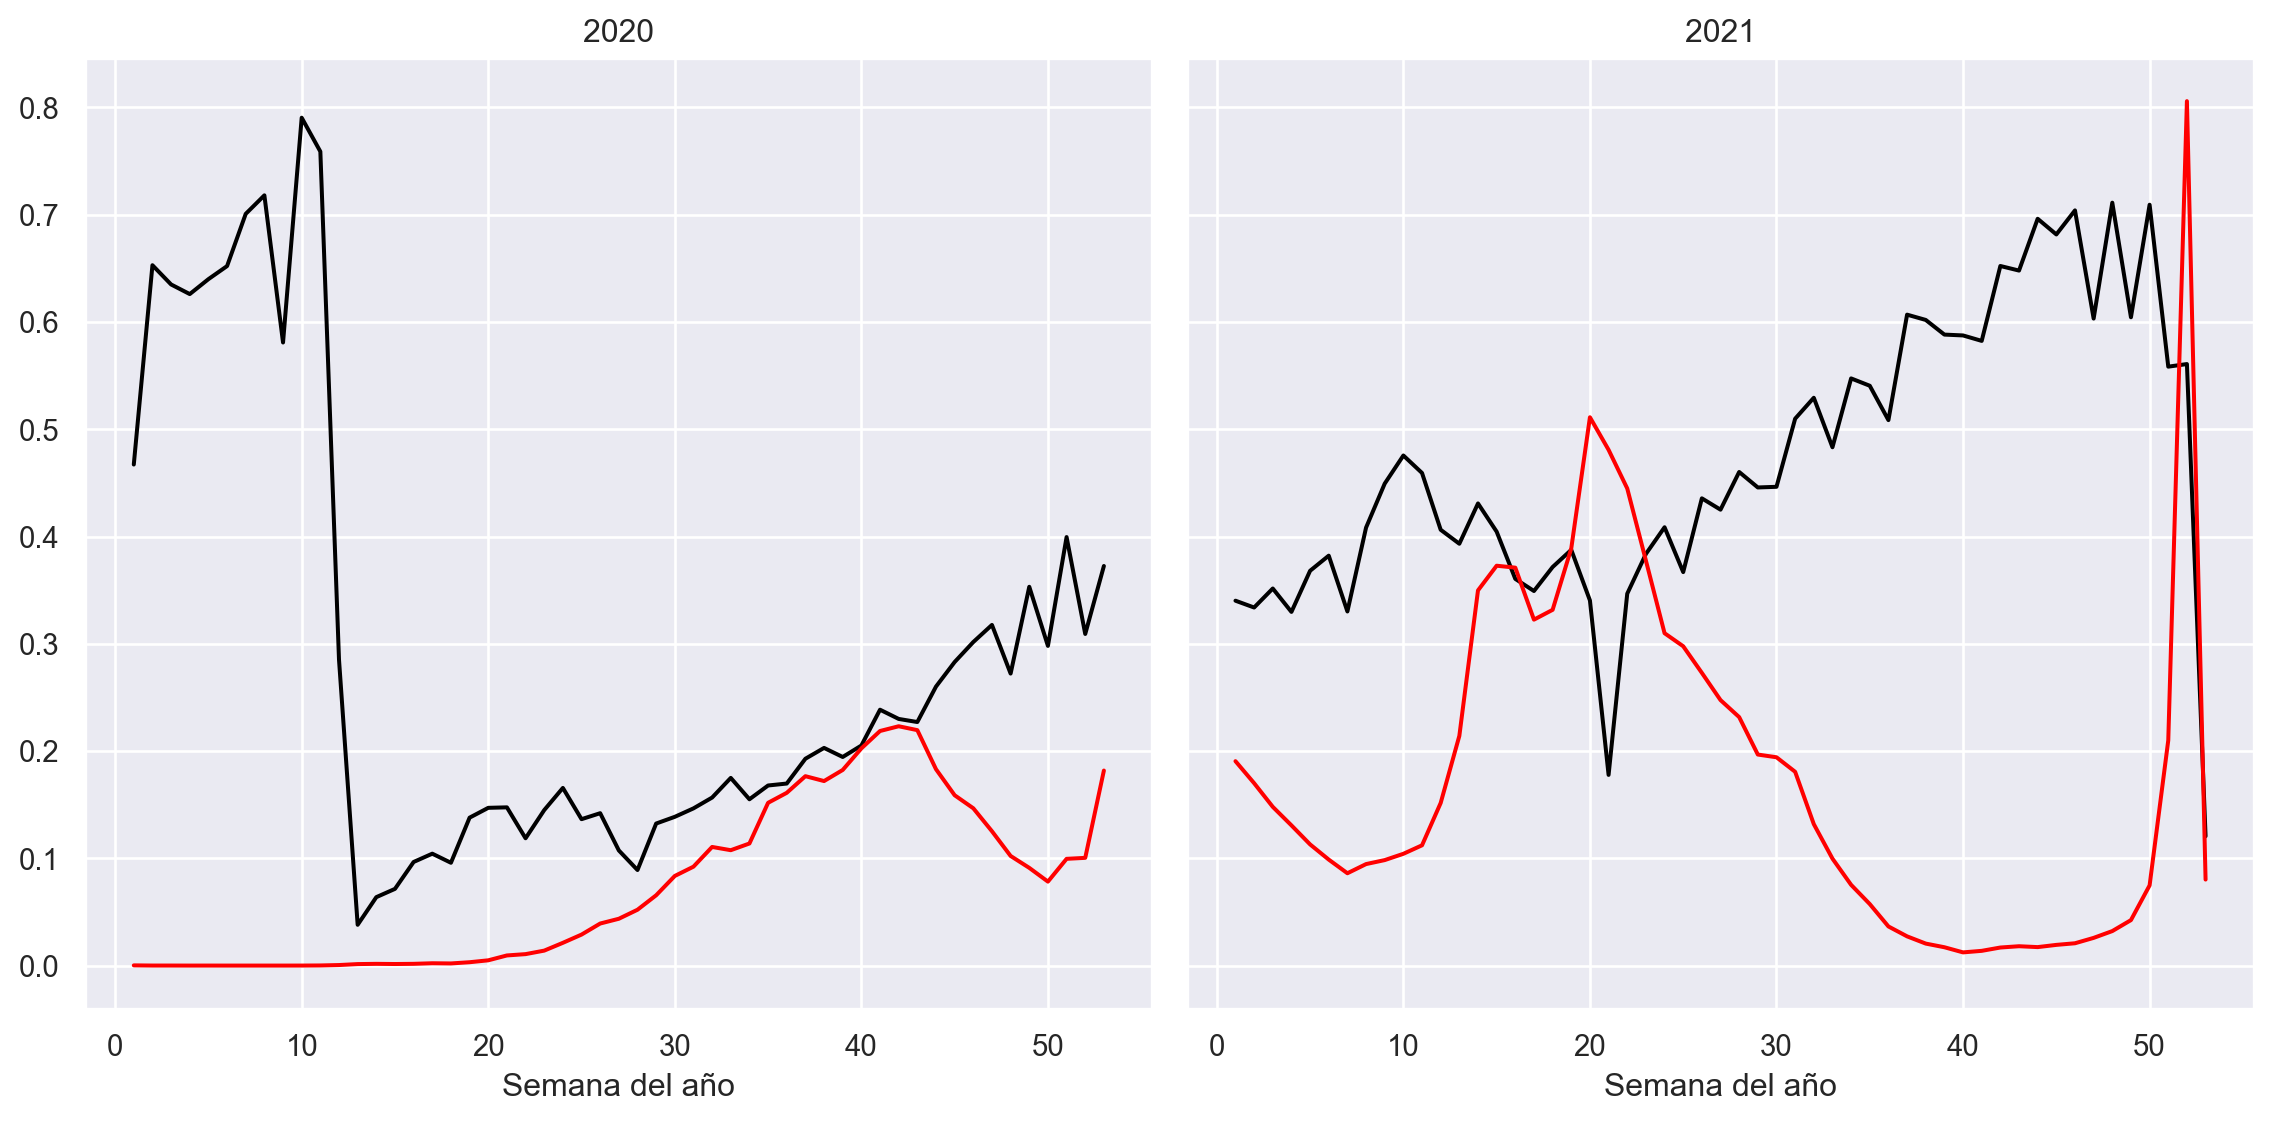

In [20]:
# Comparamos gráficamente

(
    so.Plot(data = cantidad_pasajeros_diarios_2020_2021, x = "SEMANA_AÑO", y = "CANTIDAD_scaled")
    .add(so.Line(color = "black"), so.Agg("mean"))
    .add(so.Line(color = "red"), so.Agg("mean"), data = datos_covid_2020_2021, x = "semana_año", y = "casos_dx_scaled")
    .facet("AÑO")
    .layout(size = (12,6))
    .label(x = "Semana del año", y = "")
)

La notable reducción en la cantidad de pasajeros que se observaba a medidados de 2021, coincide con un pico de casos de Covid. Luego de eso, los casos descienden de manera notable, y en consecuencia, la cantidad de pasajeros aumenta. Es en esa época del año, cuando se comienza a vacunar a la población de manera masiva.

A partir de ese punto, hasta las últimas semanas del año, las curvas están casi espejadas.

Podemos concluir, a partir de ambas visualizaciones, que la flexibilización en las medidas de cuidado frente al virus, se relacionan directamente con el uso del transporte público.

---
#### ¿Cuál es el rol de las vacaciones de verano en la variación del uso del transporte público?

Si graficamos la cantidad total de usuarios en el país, para cada mes, podemos observar que en enero y febrero, el número es menor a comparación del resto del año

In [21]:
# Agregamos columnas al dataset original

sube_2023["MES"] = sube_2023["DIA_TRANSPORTE"].dt.month_name().str.slice(0,3)
sube_2023["SEMANA_AÑO"] = sube_2023["DIA_TRANSPORTE"].dt.strftime("%U").astype(int) # no me funcionaba dt.isocalendar().week :/
sube_2023["CANTIDAD_PROMEDIO_SEMANA"] = sube_2023.groupby("SEMANA_AÑO")["CANTIDAD"].transform("mean")

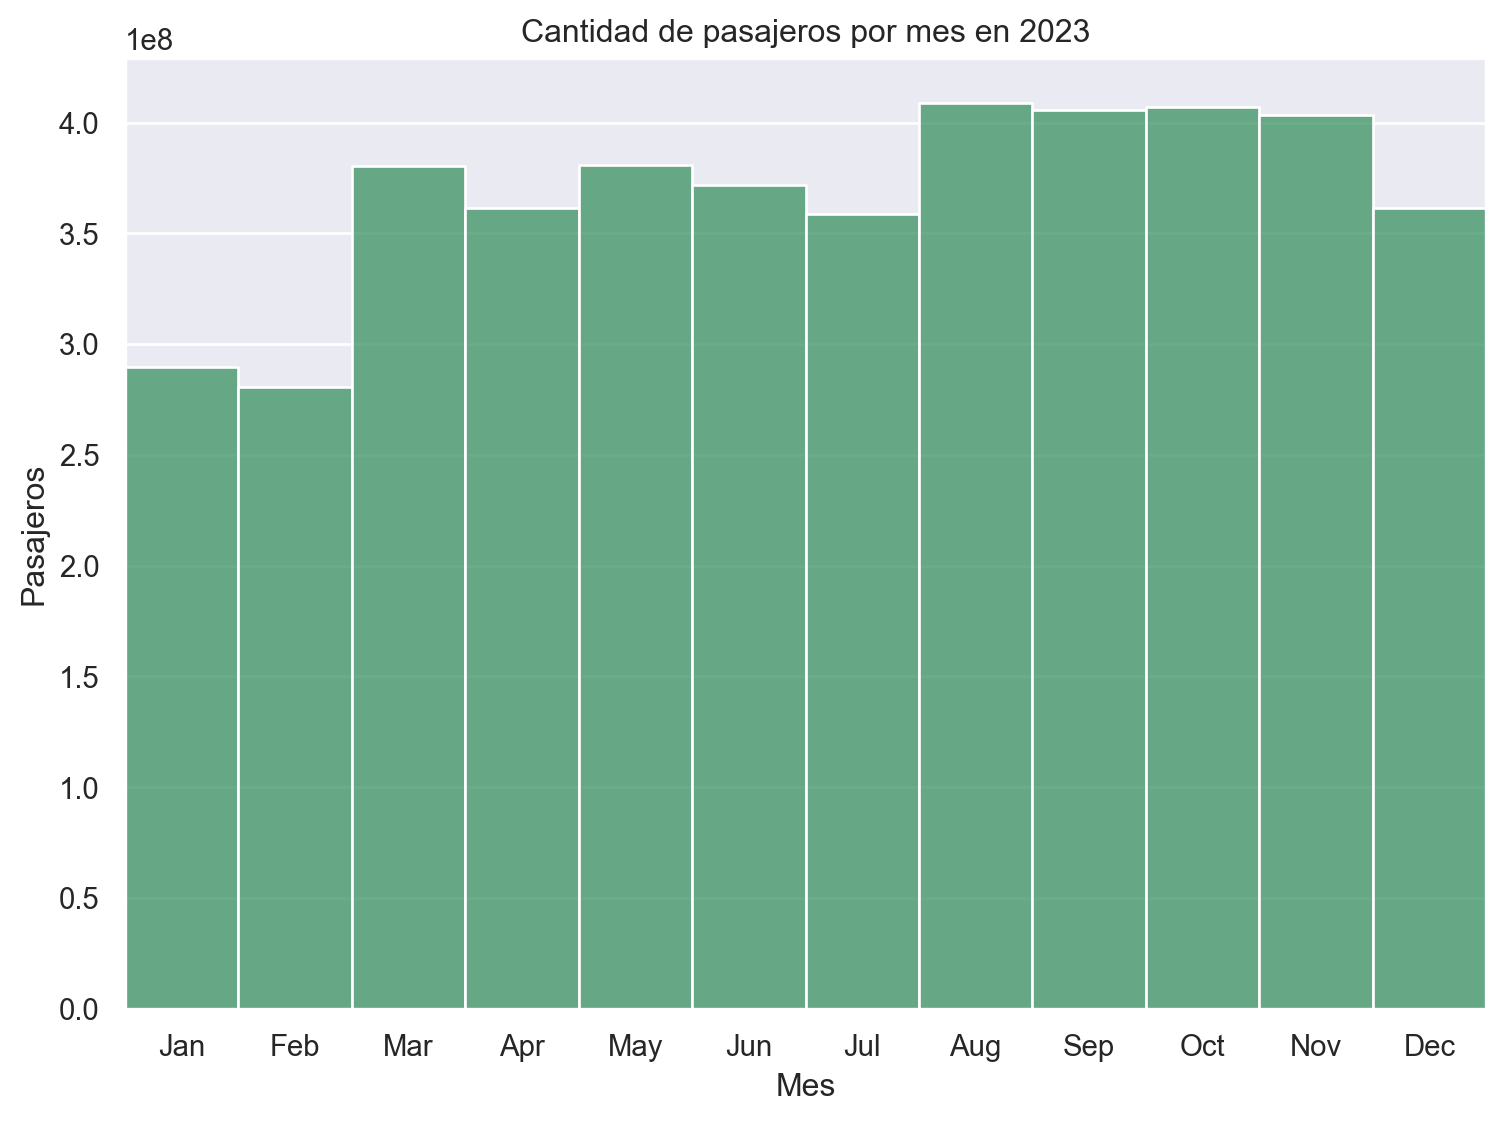

In [22]:
(
    so.Plot(data = sube_2023, x = "MES", y = "CANTIDAD")
    .add(so.Bars(color = "seagreen"), so.Agg("sum"))
    .layout(size=(8,6))
    .label(x = "Mes", y = "Pasajeros", title = "Cantidad de pasajeros por mes en 2023")
)

Pero, ¿es así en todo el país? Veamos qué pasa en el destino turistico más elegido: la Costa 🏖️

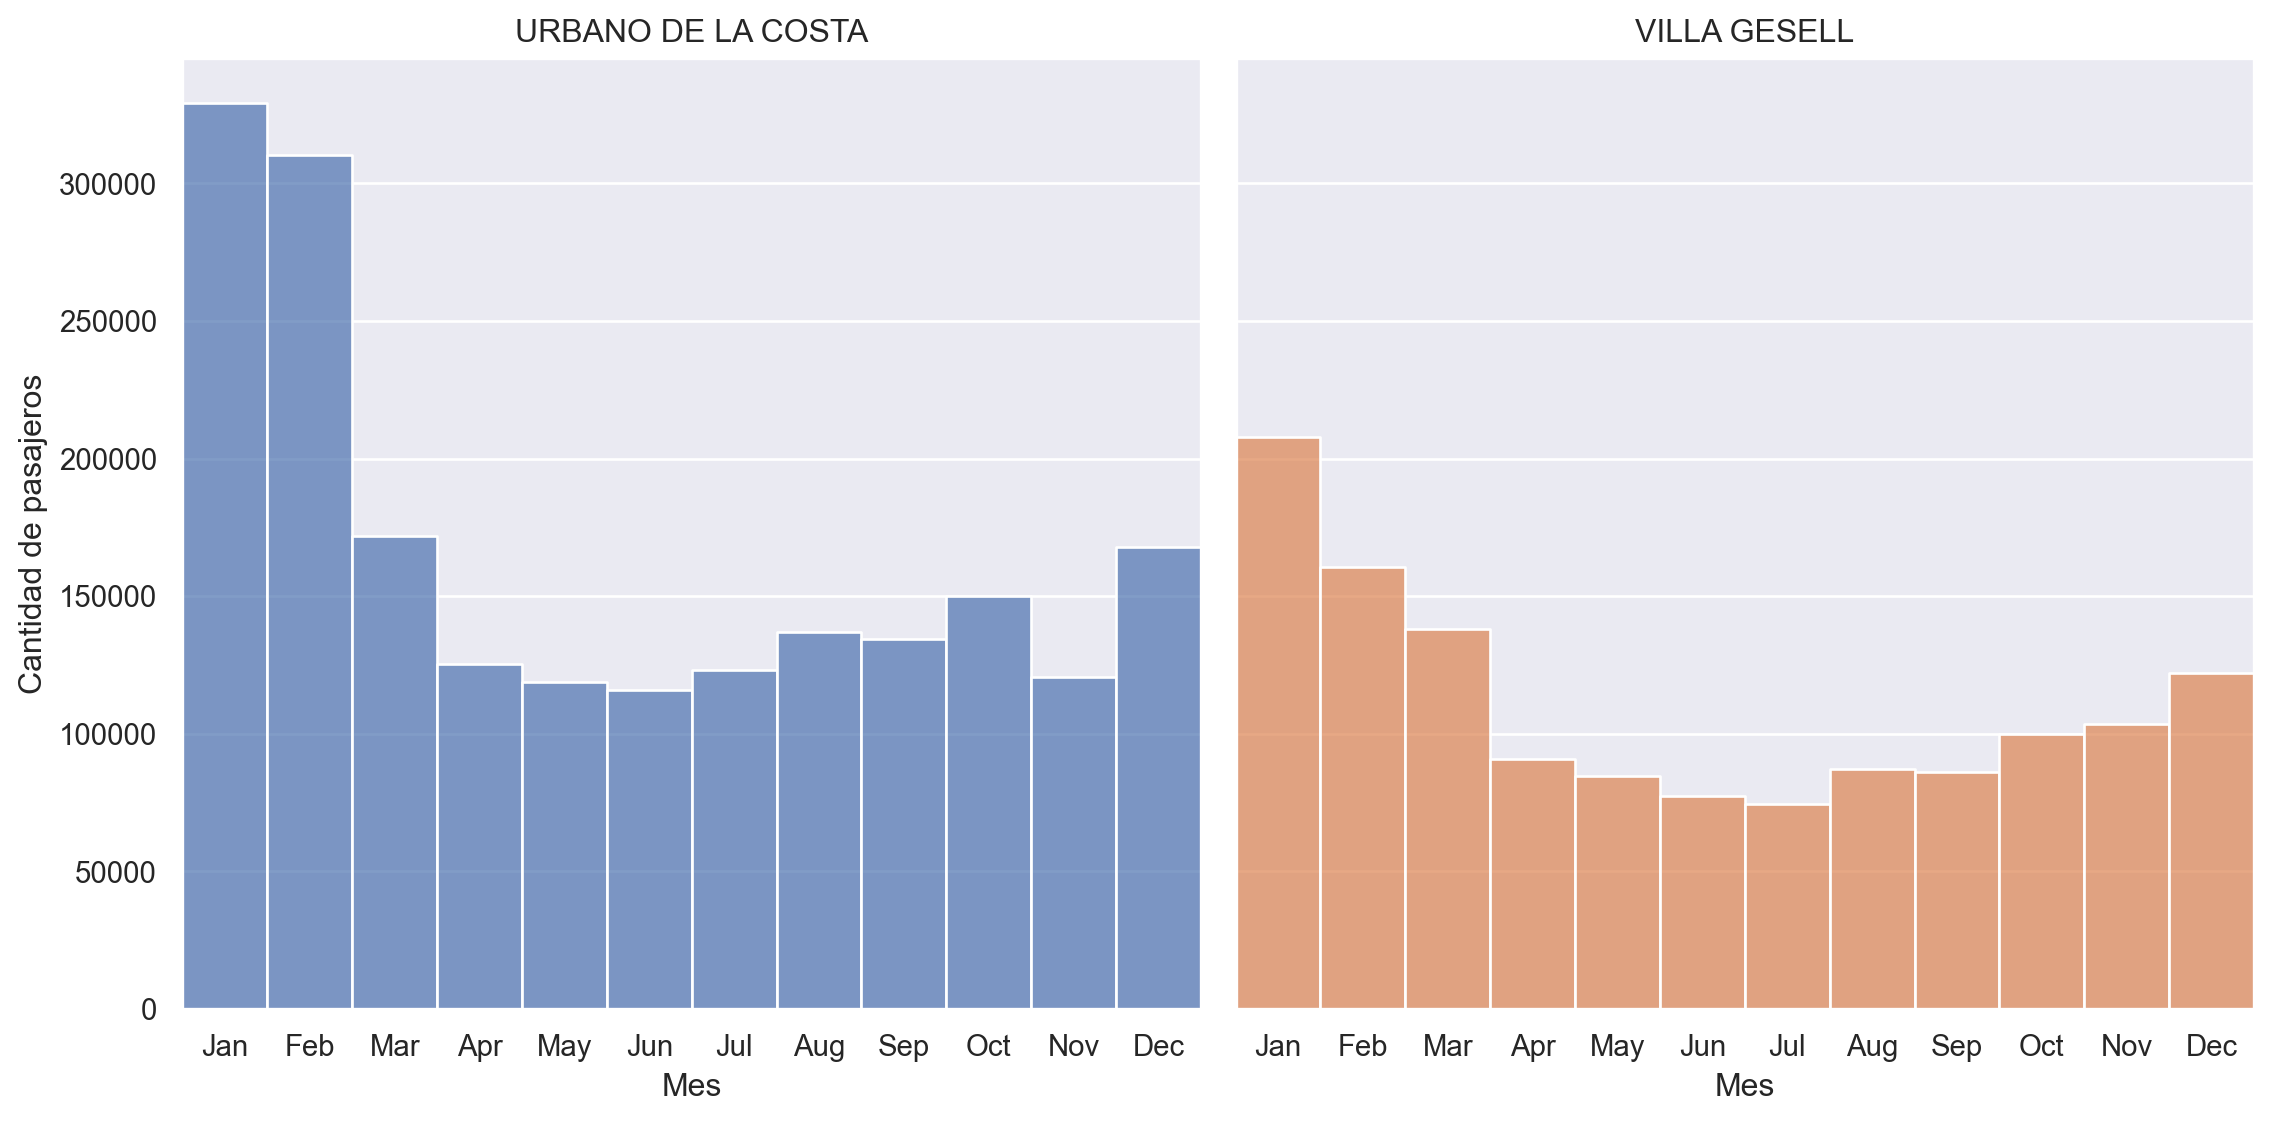

In [23]:
(
    so.Plot(data = sube_2023[sube_2023["MUNICIPIO"].isin(["URBANO DE LA COSTA","VILLA GESELL"])], x = "MES", y = "CANTIDAD")
    .add(so.Bars(), so.Agg("sum"), color = "MUNICIPIO", legend = False)
    .layout(size=(12,6))
    .facet("MUNICIPIO")
    .label(x = "Mes", y = "Cantidad de pasajeros")
)

Claramente, sucede lo contrario.

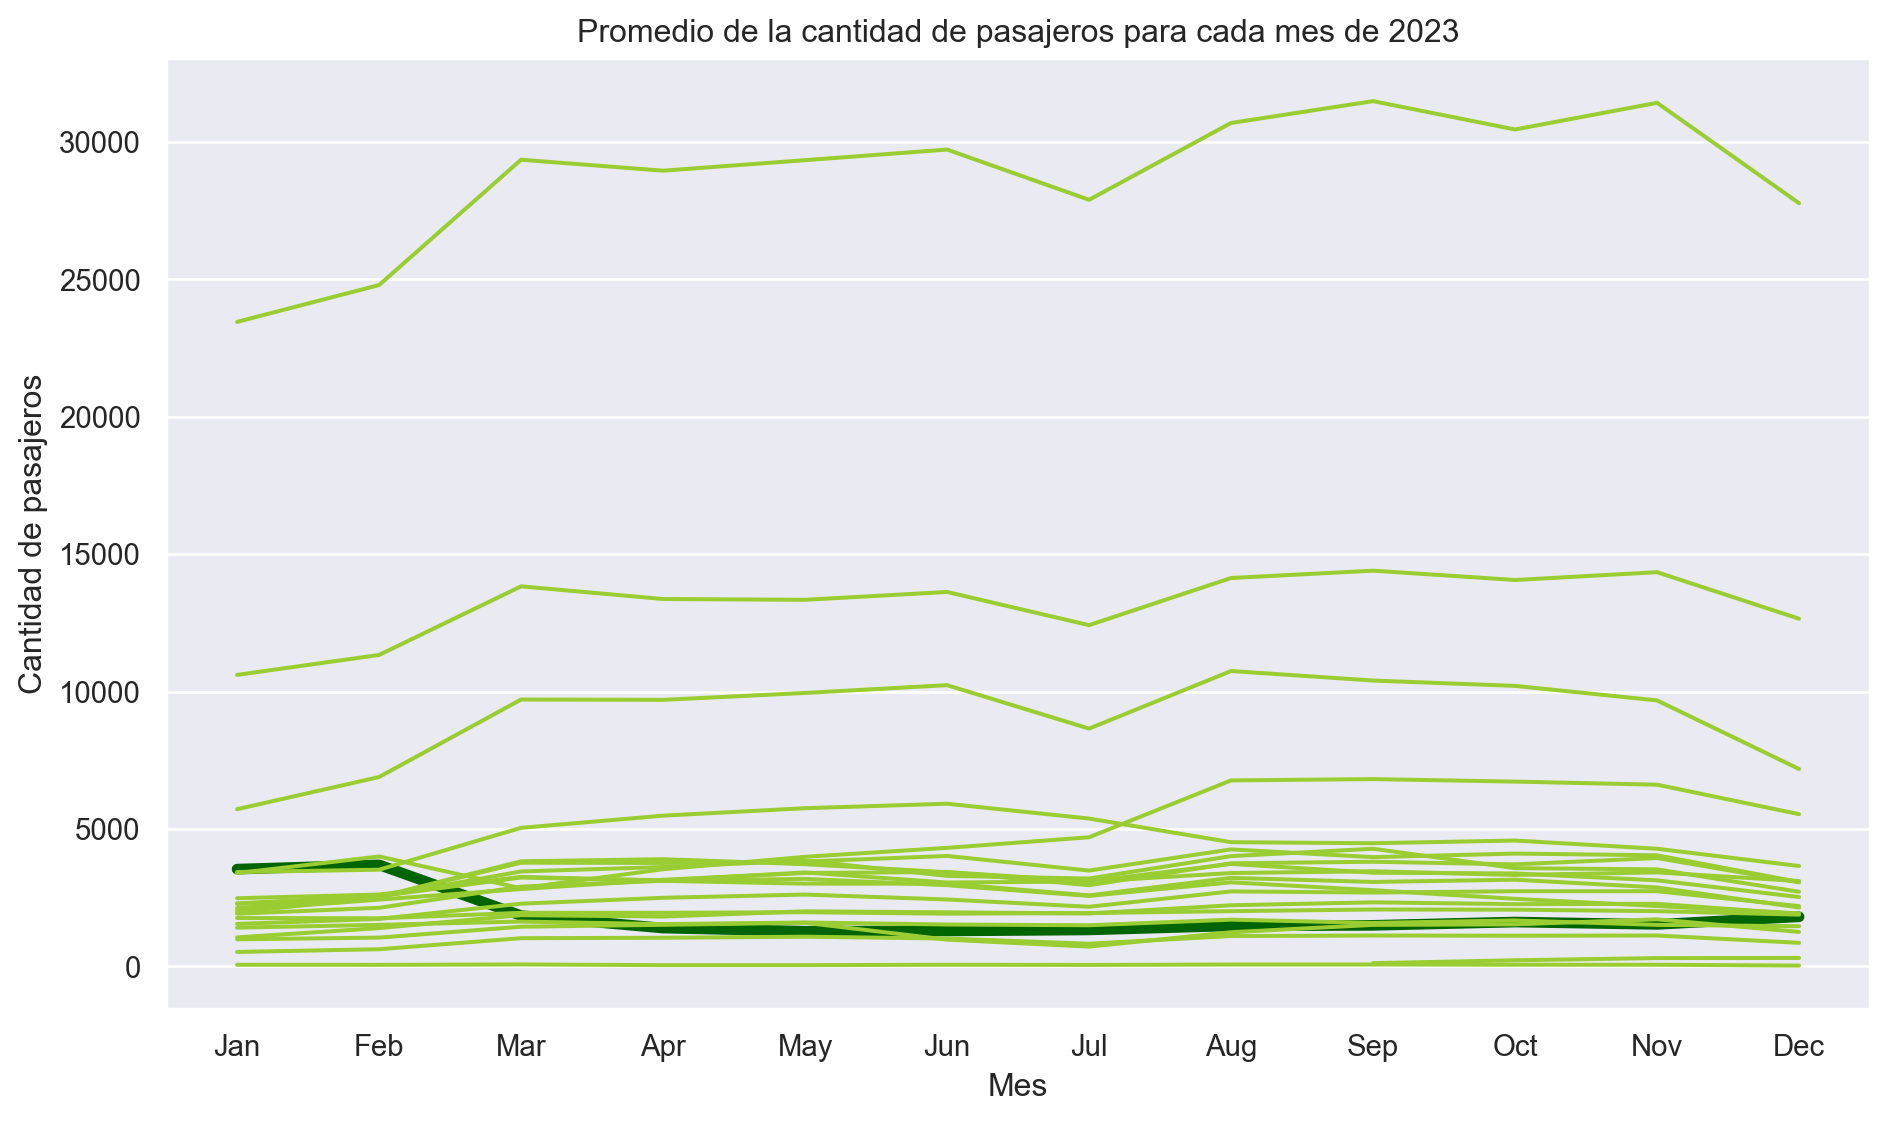

In [24]:
(
    so.Plot(data = sube_2023[(sube_2023["MUNICIPIO"] != "URBANO DE LA COSTA")], x = "MES", y = "CANTIDAD")
    .add(so.Line(color = "darkgreen", linewidth=4), so.Agg("mean"), data = sube_2023[sube_2023["MUNICIPIO"] == "URBANO DE LA COSTA"])
    .add(so.Line(color = "yellowgreen"),so.Agg("mean"), group = "PROVINCIA")
    .label(x = "Mes", y = "Cantidad de pasajeros", title = "Promedio de la cantidad de pasajeros para cada mes de 2023")
    .layout(size=(10,6))
)

Mientras que en el resto del país, la actividad es menor, la Costa alcanza su pico de pasajeros.

---
#### ¿Cuánto varía la cantidad de pasajeros en cada día de la semana?

In [25]:
# Agregamos la columna día y el total diario
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sube_2023["DIA"] = pd.Categorical(sube_2023["DIA_TRANSPORTE"].dt.day_name(), categories = days_order, ordered = True)
sube_2023["CANTIDAD_TOTAL_DIA"] = sube_2023.groupby(["DIA_TRANSPORTE"])["CANTIDAD"].transform("sum")

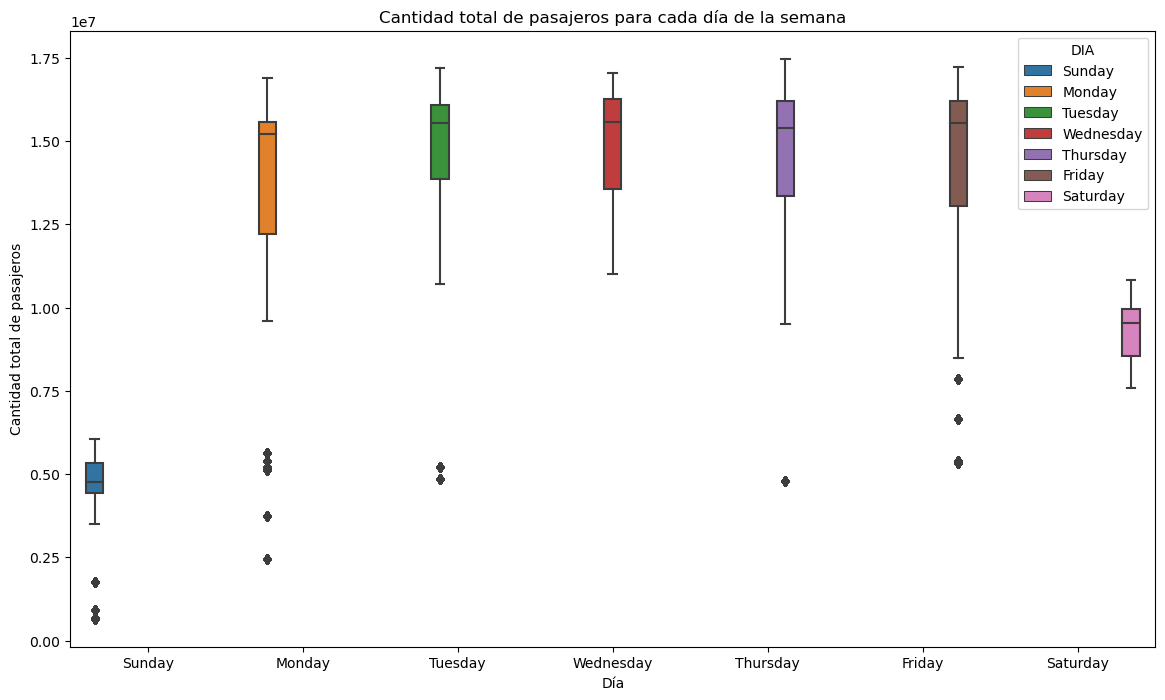

In [26]:
# Graficamos
plt.figure(figsize=(14,8))
sns.boxplot(data = sube_2023, x = "DIA", y = "CANTIDAD_TOTAL_DIA", hue = "DIA")
plt.xlabel("Día")
plt.ylabel("Cantidad total de pasajeros")
plt.title("Cantidad total de pasajeros para cada día de la semana")
plt.show()

De este gráfico, podemos concluir que los días sábado y domingo, son aquellos con menor cantidad de pasajeros, y los que menos varían.

Los días hábiles, siguen todos un esquema similar, siendo los días lunes y viernes, aquellos que varían mas respecto a esta cantidad.

Veremos en lo siguiente, que pueden representar los outliers del gráfico.

---
#### ¿Cuál es el efecto de los feriados en la actividad del transporte público? ¿Y los paros?

Veamos el caso del subte

In [27]:
# Agregamos la columna Promedio diario
sube_2023["CANTIDAD_PROMEDIO_DIARIO"] = sube_2023.groupby(["DIA_TRANSPORTE","TIPO_TRANSPORTE"])["CANTIDAD"].transform("mean")

In [28]:
# Días de paros y feriados

feriados = pd.to_datetime(pd.Series(["2023-01-01","2023-02-20","2023-02-21","2023-03-24","2023-04-02","2023-04-06","2023-04-07",
                                     "2023-05-01","2023-05-25","2023-06-17","2023-06-20","2023-07-09","2023-08-21","2023-10-13",
                                     "2023-11-20","2023-12-08","2023-12-25","2023-12-31"]))

paros = pd.to_datetime(pd.Series(["2023-02-14","2023-03-29","2023-04-10","2023-05-08","2023-05-15","2023-05-23",
                                  "2023-06-08","2023-07-26","2023-08-03","2023-09-22","2023-10-03"]))

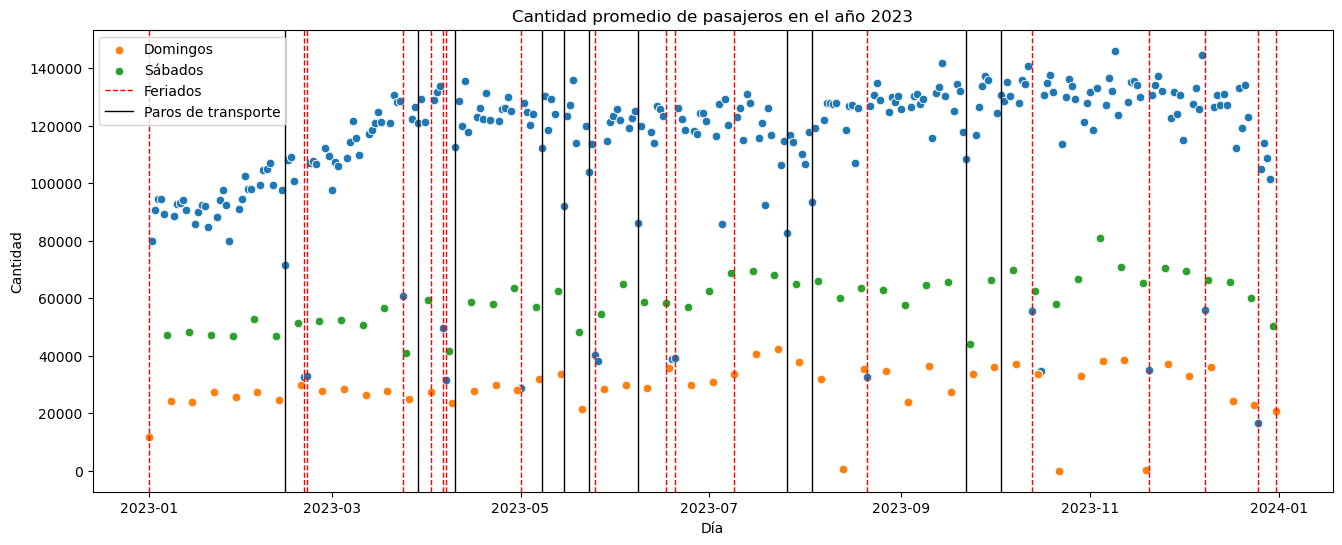

In [29]:
plt.figure(figsize = (16,6))
sns.scatterplot(data = sube_2023[sube_2023["TIPO_TRANSPORTE"] == "SUBTE"], x = "DIA_TRANSPORTE", y = "CANTIDAD_PROMEDIO_DIARIO")
sns.scatterplot(data = sube_2023[(sube_2023["TIPO_TRANSPORTE"] == "SUBTE") & (sube_2023["DIA"] == "Sunday")], x = "DIA_TRANSPORTE", y = "CANTIDAD_PROMEDIO_DIARIO", label = "Domingos")
sns.scatterplot(data = sube_2023[(sube_2023["TIPO_TRANSPORTE"] == "SUBTE") & (sube_2023["DIA"] == "Saturday")], x = "DIA_TRANSPORTE", y = "CANTIDAD_PROMEDIO_DIARIO", label = "Sábados")
# Marcamos los feriados
plt.axvline(x = feriados[0], color = "red", linestyle = "--", linewidth = 1, label = "Feriados")
for feriado in feriados[1:]:
    plt.axvline(x = feriado, color = "red", linestyle = "--", linewidth = 1)
plt.axvline(x = paros[0], color = "black", linewidth = 1, label = "Paros de transporte")
for paro in paros[1:]:
    plt.axvline(x = paro, color = "black", linewidth = 1)
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.title("Cantidad promedio de pasajeros en el año 2023")
plt.legend()
plt.show()

Podemos concluir, viendo el gráfico, que los outliers están explicados por los feriados y los paros de transporte ocurridos a lo largo del año.

Se observa que algunos días de paro tienen mayor cantidad de pasajeros que otros. Esto se debe a que no todas las lineas se ahirieron a algunos de ellos, y los paros, en su mayoría, eran durante un lapso breve de tiempo, de aproximadamente 2~3 horas.

# Ejercicio 5

In [30]:
sube_r = pd.read_csv('sube-2023-regresion.csv')
sube_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323326 entries, 0 to 323325
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   323326 non-null  object
 1   NOMBRE_EMPRESA   323326 non-null  object
 2   LINEA            323326 non-null  object
 3   AMBA             323326 non-null  object
 4   TIPO_TRANSPORTE  323326 non-null  object
 5   JURISDICCION     321581 non-null  object
 6   PROVINCIA        321566 non-null  object
 7   MUNICIPIO        321566 non-null  object
 8   CANTIDAD         323326 non-null  int64 
 9   DATO_PRELIMINAR  323326 non-null  object
dtypes: int64(1), object(9)
memory usage: 24.7+ MB


In [31]:
sube_r['DIA_TRANSPORTE'] = pd.to_datetime(sube_r['DIA_TRANSPORTE'], format = "%Y-%m-%d")
sube_r['FECHA_ORDINAL'] = sube_r['DIA_TRANSPORTE'].dt.dayofyear
sube_r.info()
sube_r.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323326 entries, 0 to 323325
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   323326 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   323326 non-null  object        
 2   LINEA            323326 non-null  object        
 3   AMBA             323326 non-null  object        
 4   TIPO_TRANSPORTE  323326 non-null  object        
 5   JURISDICCION     321581 non-null  object        
 6   PROVINCIA        321566 non-null  object        
 7   MUNICIPIO        321566 non-null  object        
 8   CANTIDAD         323326 non-null  int64         
 9   DATO_PRELIMINAR  323326 non-null  object        
 10  FECHA_ORDINAL    323326 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 25.9+ MB


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,1


In [32]:
datos_ColectivoJN = sube_r[(sube_r['PROVINCIA'] == 'JN') & (sube_r['AMBA'] == 'SI')]
cols = datos_ColectivoJN['LINEA'].unique()

pasajeros_por_linea = pd.DataFrame()
for col in cols:
    datos_linea = datos_ColectivoJN[datos_ColectivoJN['LINEA'] == col][["DIA_TRANSPORTE", "CANTIDAD"]]
    datos_linea = datos_linea.set_index("DIA_TRANSPORTE").rename(columns = {"CANTIDAD" : col })
    pasajeros_por_linea = pd.concat([pasajeros_por_linea, datos_linea ], axis = 1)

pasajeros_por_linea = pasajeros_por_linea.dropna(axis = 1)
pasajeros_por_linea.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
for l in pasajeros_por_linea.columns:
    print(l)

BS_ASLINEA_123
BSAS_LINEA_002
BSAS_LINEA_009
BSAS_LINEA_010
BSAS_LINEA_015
BSAS_LINEA_017
BSAS_LINEA_019
BSAS_LINEA_020
BSAS_LINEA_021
BSAS_LINEA_022
BSAS_LINEA_024
BSAS_LINEA_026
BSAS_LINEA_029
BSAS_LINEA_032
BSAS_LINEA_034
BSAS_LINEA_037
BSAS_LINEA_039
BSAS_LINEA_041
BSAS_LINEA_045
BSAS_LINEA_046
BSAS_LINEA_047
BSAS_LINEA_049
BSAS_LINEA_051
BSAS_LINEA_053
BSAS_LINEA_055
BSAS_LINEA_056
BSAS_LINEA_057
BSAS_LINEA_059
BSAS_LINEA_060
BSAS_LINEA_061
BSAS_LINEA_062
BSAS_LINEA_063
BSAS_LINEA_064
BSAS_LINEA_067
BSAS_LINEA_068
BSAS_LINEA_070
BSAS_LINEA_071
BSAS_LINEA_074
BSAS_LINEA_075
BSAS_LINEA_078
BSAS_LINEA_079
BSAS_LINEA_080
BSAS_LINEA_084
BSAS_LINEA_085
BSAS_LINEA_086
BSAS_LINEA_087
BSAS_LINEA_088
BSAS_LINEA_091
BSAS_LINEA_092
BSAS_LINEA_093
BSAS_LINEA_095
BSAS_LINEA_096
BSAS_LINEA_097
BSAS_LINEA_098
BSAS_LINEA_100
BSAS_LINEA_102
BSAS_LINEA_103
BSAS_LINEA_105
BSAS_LINEA_106
BSAS_LINEA_108
BSAS_LINEA_109
BSAS_LINEA_110
BSAS_LINEA_111
BSAS_LINEA_113
BSAS_LINEA_115
BSAS_LINEA_117
BSAS_LINEA

In [33]:
columnas_con_nulos = pasajeros_por_linea.columns[pasajeros_por_linea.isnull().any()]

print("Columnas con datos faltantes:")
print(columnas_con_nulos)

Columnas con datos faltantes:
Index([], dtype='object')


In [34]:
sube_train, sube_test = train_test_split(pasajeros_por_linea, test_size=0.2, random_state=42)


# Método 1



Selecciono 5 lineas de colectivo al azar y vemos que sucede.

In [35]:
import random
random.seed(20)
lineasAlAzar = random.sample(pasajeros_por_linea.columns.tolist(), 5)
lineasAlAzar

['BSAS_LINEA_075',
 'BSAS_LINEA_118',
 'BSAS_LINEA_056',
 'BSAS_LINEA_154',
 'BSAS_LINEA_085']

Separo en

In [36]:
formula1 = 'BSAS_LINEA_009 ~ BSAS_LINEA_075 + BSAS_LINEA_118 + BSAS_LINEA_056 + BSAS_LINEA_154 + BSAS_LINEA_085'
y1, X1 =  Formula(formula1).get_model_matrix(sube_train)

Establecemos los folds, definimos el modelo y creamos una lista donde almacenamos los ECM de cada regresión


In [37]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
modeloColectivosAlAzar = linear_model.LinearRegression(fit_intercept = False)
rmse1 = np.zeros(cv.get_n_splits())
rmod1 = np.zeros(cv.get_n_splits())

Hacemos las regresiones para los distintos folds


In [38]:
ind = 0

for train_index, val_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modeloColectivosAlAzar.fit(X_train, y_train)

    y_pred = modeloColectivosAlAzar.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    rmod1[ind] = r2_score(y_val, y_pred)

    ind = ind + 1

print('Promedio de raiz cuadarada del ECM del modeloColectivosAlAzar: ', rmse1.mean())
print('Promedio de los r2 del modeloColectivosAlAzar es: ',rmod1.mean())

Promedio de raiz cuadarada del ECM del modeloColectivosAlAzar:  2660.9842528076406
Promedio de los r2 del modeloColectivosAlAzar es:  0.9275172018503932


Bajo estas dos métricas podemos afirmar que la predicción es bastante acertada, pero se puede mejorar...


## Método 2


#### Elegimos a mano lineas de colectivos para predecir al 9
Nos fijamos a mano algunas lineas que tengan recorridos parecidos o que en su recorrido tengan algunos puntos muy transitados en comun para poder hacernos una idea mas fiel de cuantos pasajeros utilizaron la linea 9

- BSAS_LINEA_020
- BSAS_LINEA_100
- BSAS_LINEA_067
- BSAS_LINEA_188
- BSAS_LINEA_045
- BSAS_LINEA_128
- LINEA_164_AMBA
- BSAS_LINEA_070

#### De las 8 lineas elegidas personalmente creamos todas las posibles formulas que contengan a 5 de ellas, con y sin intercept

In [39]:
from itertools import combinations

nombres = [
    "BSAS_LINEA_020",
    "LINEA_28",
    "BSAS_LINEA_067",
    "BSAS_LINEA_188",
    "BSAS_LINEA_045",
    "BSAS_LINEA_128",
    "LINEA_164_AMBA",
    "BSAS_LINEA_070"
]
sets_of_5 = list(combinations(nombres, 5))

formulas = []
for s in sets_of_5:
    formulas.append(f'BSAS_LINEA_009 ~ {s[0]} + {s[1]} + {s[2]} + {s[3]} + {s[4]} - 1')
    formulas.append(f'BSAS_LINEA_009 ~ {s[0]} + {s[1]} + {s[2]} + {s[3]} + {s[4]}')

#### Ahora realizamos la regresión con cada una de las formulas, almacenando los ECM en una lista y luego devolvemos el menor valor

In [40]:
ECMS = []

indice = 0
for f in formulas:
    y2, X2 = (
        Formula(f)
        .get_model_matrix(sube_train)
    )

    cv = KFold(n_splits=5, random_state= 42, shuffle=True)

    modelo2 = linear_model.LinearRegression(fit_intercept = False)
    rmse2 = np.zeros(cv.get_n_splits())

    ind = 0

    for train_index, val_index in cv.split(X2):
        X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
        modelo2.fit(X_train, y_train)

        y_pred = modelo2.predict(X_val)
        rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))


        ind = ind + 1
        indice = indice + 1
    ECMS.append(rmse2.mean())

min_index = ECMS.index(min(ECMS))
print(f'Min ECM conseguido: {ECMS[min_index]}')
print(f'Formula que se usó: {formulas[min_index]}')

Min ECM conseguido: 2123.1576687532797
Formula que se usó: BSAS_LINEA_009 ~ BSAS_LINEA_020 + LINEA_28 + BSAS_LINEA_067 + BSAS_LINEA_128 + LINEA_164_AMBA - 1


#### Realizamos nuevamente la regresión pero esta vez usando la combinación de colectivos que nos dio el mejor resultado
#### Separamos en entrenamiento y testeo

In [41]:
formula2 = formulas[min_index]
y2, X2 = (
    Formula(formula2)
    .get_model_matrix(sube_train)
)

#### Establecemos los folds,  definimos el modelo y creamos una lista donde almacenamos los ECM de cada regresión

In [42]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
modelo2 = linear_model.LinearRegression(fit_intercept = False)
rmse2 = np.zeros(cv.get_n_splits())
rmod2 = np.zeros(cv.get_n_splits())

#### Hacemos las regresiones para los distintos folds

In [43]:
ind = 0

for train_index, val_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y2.iloc[train_index], y2.iloc[val_index]
    modelo2.fit(X_train, y_train)

    y_pred = modelo2.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    rmod2[ind] = r2_score(y_val, y_pred)
    
    ind = ind + 1

print('Promedio de raiz cuadarada del ECM del modelo 2: ', rmse2.mean())
print('Promedio de los r2 del modelo 2 es: ',rmod2.mean())

Promedio de raiz cuadarada del ECM del modelo 2:  2123.1576687532797
Promedio de los r2 del modelo 2 es:  0.9546065640626695


En ambas métricas mejoramos respecto al modelo anterior, asi que parece haber funcionado la eleccion de colectivos.


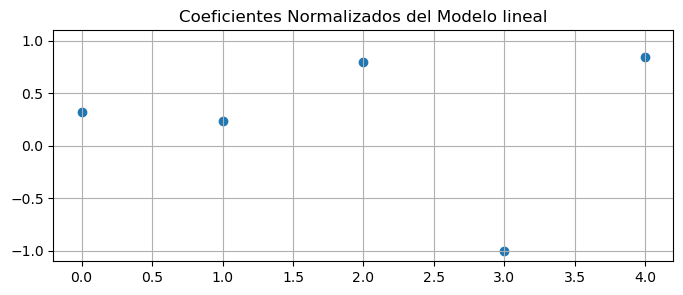

In [44]:
coefs = (modelo2.coef_[0]/np.max(abs(modelo2.coef_[0]))).tolist()
plt.figure(figsize=(8, 3))
plt.scatter(np.arange(0,len(coefs)),coefs)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.title('Coeficientes Normalizados del Modelo lineal')
plt.show()

# Método 3

### Ahora probamos con Regresion Ridge

#### Separamos en entrenamiento y testeo

In [45]:
formula3 = 'BSAS_LINEA_009 ~ (BSAS_LINEA_020 + BSAS_LINEA_067 + BSAS_LINEA_188 + BSAS_LINEA_128 + LINEA_164_AMBA)*(BSAS_LINEA_020 + BSAS_LINEA_067 + BSAS_LINEA_188 + BSAS_LINEA_128 + LINEA_164_AMBA)-1'
y3, X3 =  Formula(formula3).get_model_matrix(sube_train)


X3 = (X3 - X3.min()) / (X3.max() - X3.min())

#### Creamos una lista con alphas que vamos a usar para penalizar los coeficientes altos

In [46]:
alphas = np.arange(0,0.01,0.0001)

#### Definimos los folds y hacemos el regresion ridge con cada uno de los alphas
#### Probamos con alphas mayores a 0.1 y el error aumenta, entonces nos limitamos a este intervalo

In [47]:
cv = KFold(n_splits=5, random_state=73, shuffle=True)

min_ecm = 10**10
alpha_min = 0

for alpha in alphas:
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)
    rmse3 = np.zeros(cv.get_n_splits())
    ind = 0
    for train_index, val_index in cv.split(X3):
        X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    if rmse3.mean() < min_ecm:
        min_ecm = rmse3.mean()
        alpha_min = alpha
print(f'Min ecm conseguido: {min_ecm}')
print(f'Alpha que lo consiguió: {alpha_min}')

Min ecm conseguido: 2212.84340018454
Alpha que lo consiguió: 0.0022


#### Con el alpha definido, hacemos la regresión una vez mas y revisamos los coeficientes

In [48]:
modeloRidge = linear_model.Ridge(alpha = alpha_min, fit_intercept = False)
rmse3 = np.zeros(cv.get_n_splits())
rmod3 = np.zeros(cv.get_n_splits())
ind = 0
y_pred = 0
y_val = 0
for train_index, val_index in cv.split(X3):
    X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y3.iloc[train_index], y3.iloc[val_index]
    modeloRidge.fit(X_train, y_train)

    y_pred = modeloRidge.predict(X_val)
    rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    rmod3[ind] = r2_score(y_val, y_pred)
    ind = ind + 1

print('Promedio de raiz cuadarada del modelo Ridge: ', rmse3.mean())
print('Promedio de los r2 del modelo Ridge: ',rmod3.mean())

Promedio de raiz cuadarada del modelo Ridge:  2212.84340018454
Promedio de los r2 del modelo Ridge:  0.9482599674203314


Este método no logró mejorar los datos que conseguimos con el método 2

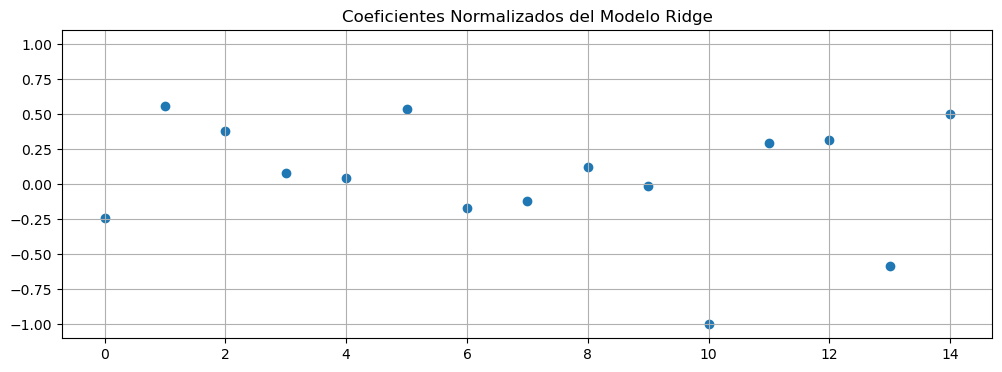

In [49]:
coefs = (modeloRidge.coef_[0]/np.max(abs(modeloRidge.coef_[0]))).tolist()
plt.figure(figsize=(12, 4))
plt.scatter(np.arange(0,len(coefs)),coefs)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.title('Coeficientes Normalizados del Modelo Ridge')
plt.show()

## Viendo los datos conseguidos, optamos por la fórmula encontrada por el método 2 como el que mejor aproxima los datos

R^2:  0.9620052045996362
Raiz cuadarada del ECM:  1908.3831368671738


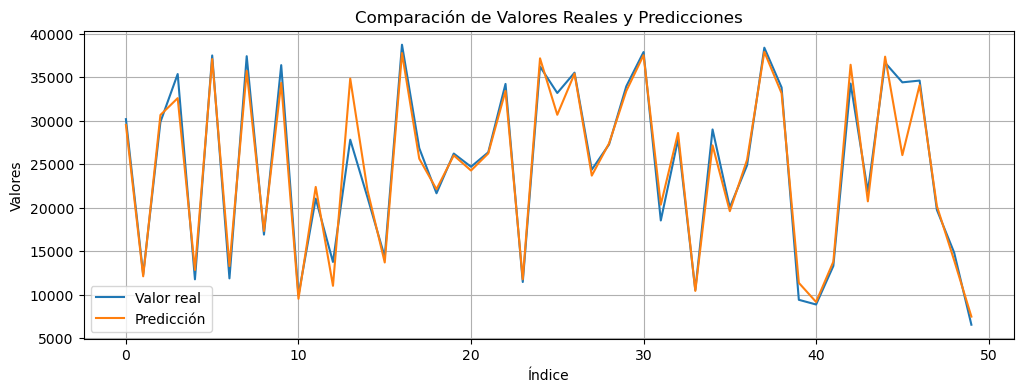

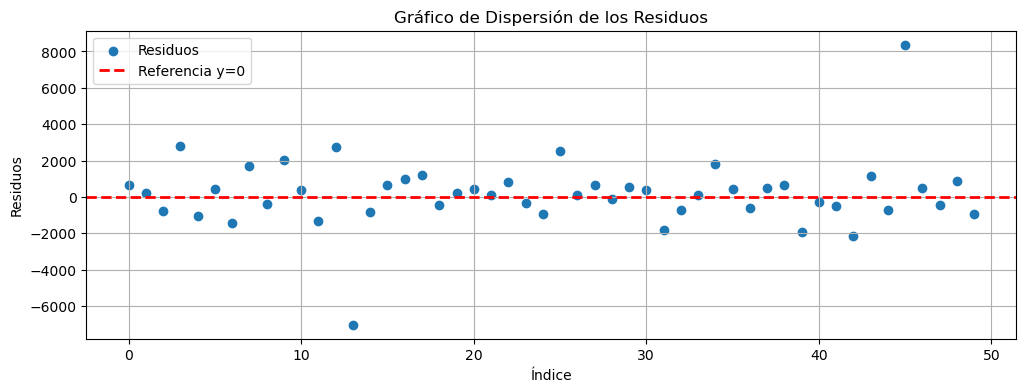

In [50]:
y_test, X_test = (
    Formula(formula2)
    .get_model_matrix(sube_test)
)
y_pred = modelo2.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(np.arange(0,len(y_test)),y_test, label="Valor real")
plt.plot(np.arange(0,len(y_pred)),y_pred, label="Predicción")
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Comparación de Valores Reales y Predicciones')
plt.legend()
plt.grid()

r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))
plt.show()


residuos = y_test - y_pred
plt.figure(figsize=(12, 4))
plt.scatter(np.arange(len(residuos)), residuos, label='Residuos')

plt.axhline(0, color='r', linestyle='--', lw=2, label='Referencia y=0')

plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.title('Gráfico de Dispersión de los Residuos')
plt.legend()
plt.grid(True)

plt.show()